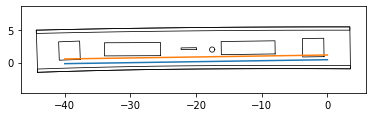

In [1]:
from ipynb.fs.full.whole_df import get_uppers, get_downers, get_whole_df, get_average_person_number, get_all_distances
import os
import numpy as np
import itertools
import pandas as pd
import statistics
import math
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
columns = columns = ["Date", "d<=0.5", "0.5<d<=1", "1<d<=1.5", "1.5<d<=2", "2<d<=2.5", "2.5<d<=3", "3<d"]
heatmapDf = pd.DataFrame(columns = columns)
#heatmapDf = heatmapDf.append({"Date": 1, "d<=0.5": 1, "0.5<d<=1": 1, "1<d<=1.5": 1, "1.5<d<=2": 1, "2<d<=2.5": 1, "2.5<d<=3": 1, "3<d": 1}, ignore_index = True)
heatmapDf

,Date,d<=0.5,0.5<d<=1,1<d<=1.5,1.5<d<=2,2<d<=2.5,2.5<d<=3,3<d


In [3]:
for filename in os.listdir(r"C:\Users\robin\Documents\Bachelorarbeit\Wartetrauben Analyse und Auswertung\Whole Dfs"):
    if "geo" not in filename:
#         df = get_whole_df(filename, 5, 5)
        df = pd.read_csv("Whole Dfs/" + filename, index_col=0)
        borderDistance = get_all_distances(df)
        print(str(len(borderDistance)) + " Abstände wurden gemessen")
        halfMeter = len([i for i in borderDistance if i <= 0.5])
        oneMeter = len([i for i in borderDistance if (i <= 1) and (i > 0.5)])
        oneAndHalfMeter = len([i for i in borderDistance if (i <= 1.5) and (i > 1)])
        twoMeter = len([i for i in borderDistance if (i <= 2) and (i > 1.5)])
        twoAndHalfMeter = len([i for i in borderDistance if (i <= 2.5) and (i > 2)])
        threeMeter = len([i for i in borderDistance if (i <= 3) and (i > 2.5)])
        biggerThree = len([i for i in borderDistance if i > 3])
        heatmapDf = heatmapDf.append({"Date": filename, "d<=0.5": halfMeter, "0.5<d<=1": oneMeter, "1<d<=1.5": oneAndHalfMeter, 
                                      "1.5<d<=2": twoMeter, "2<d<=2.5": twoAndHalfMeter, "2.5<d<=3": threeMeter, 
                                      "3<d": biggerThree}, ignore_index = True)

3428 Abstände wurden gemessen
3230 Abstände wurden gemessen
3240 Abstände wurden gemessen
2778 Abstände wurden gemessen
3884 Abstände wurden gemessen
3444 Abstände wurden gemessen
1184 Abstände wurden gemessen
506 Abstände wurden gemessen
496 Abstände wurden gemessen
830 Abstände wurden gemessen
588 Abstände wurden gemessen
748 Abstände wurden gemessen
1034 Abstände wurden gemessen
1235 Abstände wurden gemessen
1482 Abstände wurden gemessen
2030 Abstände wurden gemessen
1846 Abstände wurden gemessen
2578 Abstände wurden gemessen
2281 Abstände wurden gemessen
2730 Abstände wurden gemessen
2991 Abstände wurden gemessen
2458 Abstände wurden gemessen
2692 Abstände wurden gemessen
2577 Abstände wurden gemessen
2041 Abstände wurden gemessen
2213 Abstände wurden gemessen
2657 Abstände wurden gemessen
2822 Abstände wurden gemessen
3066 Abstände wurden gemessen
3017 Abstände wurden gemessen


In [4]:
heatmapDf

,Date,d<=0.5,0.5<d<=1,1<d<=1.5,1.5<d<=2,2<d<=2.5,2.5<d<=3,3<d
0,ZHDB_0205_6_20_5erTraubenDf.csv,75,925,735,571,500,323,299
1,ZHDB_0212_6_20_5erTraubenDf.csv,53,917,705,535,378,322,320
2,ZHDB_0219_6_20_5erTraubenDf.csv,73,881,701,519,388,322,356
3,ZHDB_0226_6_20_5erTraubenDf.csv,49,764,583,498,395,280,209
4,ZHDB_0304_6_20_5erTraubenDf.csv,89,1123,811,691,492,363,315
5,ZHDB_0311_6_20_5erTraubenDf.csv,67,905,749,544,455,373,351
6,ZHDB_0318_6_20_5erTraubenDf.csv,22,258,312,240,162,95,95
7,ZHDB_0325_6_20_5erTraubenDf.csv,9,100,128,101,77,52,39
8,ZHDB_0401_6_20_5erTraubenDf.csv,2,70,143,87,80,44,70
9,ZHDB_0408_6_20_5erTraubenDf.csv,25,159,214,184,111,64,73


In [5]:
date = heatmapDf["Date"]
heatmapDfRelatvie = pd.DataFrame(columns = columns)


In [6]:
for index, row in heatmapDf.iterrows():
    anzahlAbstande = sum(row[1:])
    date = row[0]
    relativeAbstande = row[1:]/anzahlAbstande
    heatmapDfRelatvie = heatmapDfRelatvie.append({"Date": date, "d<=0.5": relativeAbstande[0], "0.5<d<=1": relativeAbstande[1], 
                                                  "1<d<=1.5": relativeAbstande[2], "1.5<d<=2": relativeAbstande[3], 
                                                  "2<d<=2.5": relativeAbstande[4], "2.5<d<=3": relativeAbstande[5],
                                                  "3<d": relativeAbstande[6]}, ignore_index = True)

In [7]:
heatmapDfRelatvie

,Date,d<=0.5,0.5<d<=1,1<d<=1.5,1.5<d<=2,2<d<=2.5,2.5<d<=3,3<d
0,ZHDB_0205_6_20_5erTraubenDf.csv,0.021879,0.269837,0.214411,0.166569,0.145858,0.094224,0.087223
1,ZHDB_0212_6_20_5erTraubenDf.csv,0.016409,0.283901,0.218266,0.165635,0.117028,0.099690,0.099071
2,ZHDB_0219_6_20_5erTraubenDf.csv,0.022531,0.271914,0.216358,0.160185,0.119753,0.099383,0.109877
3,ZHDB_0226_6_20_5erTraubenDf.csv,0.017639,0.275018,0.209863,0.179266,0.142189,0.100792,0.075234
4,ZHDB_0304_6_20_5erTraubenDf.csv,0.022915,0.289135,0.208805,0.177909,0.126674,0.093460,0.081102
5,ZHDB_0311_6_20_5erTraubenDf.csv,0.019454,0.262776,0.217480,0.157956,0.132114,0.108304,0.101916
6,ZHDB_0318_6_20_5erTraubenDf.csv,0.018581,0.217905,0.263514,0.202703,0.136824,0.080236,0.080236
7,ZHDB_0325_6_20_5erTraubenDf.csv,0.017787,0.197628,0.252964,0.199605,0.152174,0.102767,0.077075
8,ZHDB_0401_6_20_5erTraubenDf.csv,0.004032,0.141129,0.288306,0.175403,0.161290,0.088710,0.141129
9,ZHDB_0408_6_20_5erTraubenDf.csv,0.030120,0.191566,0.257831,0.221687,0.133735,0.077108,0.087952


In [8]:
filenames = []
for filename in os.listdir(r"C:\Users\robin\Documents\Bachelorarbeit\Daten ZHDB"):
    if "geo" not in filename:
        filenames.append(filename)
filenames = [str(i[7:9]) + "." + str(i[5:7]) + ".2020" for i in filenames]

In [9]:
heatmapDfRelatvie.index = heatmapDfRelatvie.Date
heatmapDfRelatvie = heatmapDfRelatvie.drop("Date", axis = 1)
heatmapDfRelatvie.index = filenames

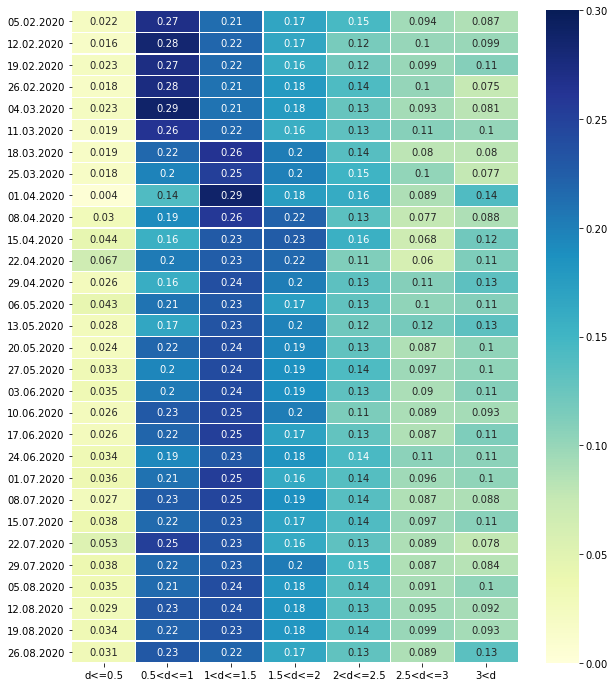

In [10]:
plt.figure(figsize = (10,12))
sb.heatmap(heatmapDfRelatvie, vmin = 0, vmax = 0.3, linewidth = 0.2 , annot = True,cmap="YlGnBu")
# plt.savefig("Heatmap_inBorder.png", dpi = 250)

In [11]:
heatmapDfRelatvieSwap = heatmapDfRelatvie.transpose()
heatmapDfRelatvieSwap

,05.02.2020,12.02.2020,19.02.2020,26.02.2020,04.03.2020,11.03.2020,18.03.2020,25.03.2020,01.04.2020,08.04.2020,...,24.06.2020,01.07.2020,08.07.2020,15.07.2020,22.07.2020,29.07.2020,05.08.2020,12.08.2020,19.08.2020,26.08.2020
d<=0.5,0.021879,0.016409,0.022531,0.017639,0.022915,0.019454,0.018581,0.017787,0.004032,0.030120,...,0.034102,0.036208,0.027117,0.038417,0.053405,0.037506,0.035002,0.029057,0.034247,0.031157
0.5<d<=1,0.269837,0.283901,0.271914,0.275018,0.289135,0.262776,0.217905,0.197628,0.141129,0.191566,...,0.193915,0.210334,0.226969,0.216531,0.252327,0.215996,0.214528,0.231042,0.221787,0.230361
1<d<=1.5,0.214411,0.218266,0.216358,0.209863,0.208805,0.217480,0.263514,0.252964,0.288306,0.257831,...,0.230692,0.254272,0.246285,0.229724,0.233219,0.226390,0.240120,0.236003,0.233855,0.220086
1.5<d<=2,0.166569,0.165635,0.160185,0.179266,0.177909,0.157956,0.202703,0.199605,0.175403,0.221687,...,0.184888,0.161920,0.188336,0.169577,0.162175,0.203344,0.180279,0.183203,0.181670,0.165065
2<d<=2.5,0.145858,0.117028,0.119753,0.142189,0.126674,0.132114,0.136824,0.152174,0.161290,0.133735,...,0.144433,0.137510,0.135958,0.141250,0.132288,0.145504,0.135491,0.134302,0.135682,0.130262
2.5<d<=3,0.094224,0.099690,0.099383,0.100792,0.093460,0.108304,0.080236,0.102767,0.088710,0.077108,...,0.105985,0.096013,0.086924,0.097012,0.088682,0.087212,0.090704,0.094614,0.099478,0.088830
3<d,0.087223,0.099071,0.109877,0.075234,0.081102,0.101916,0.080236,0.077075,0.141129,0.087952,...,0.105985,0.103743,0.088410,0.107489,0.077903,0.084049,0.103877,0.091779,0.093281,0.134239


In [12]:
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sb
plt.rcParams["font.family"] = "Microsoft Yi Baiti"
mlp.rc('font',family="Microsoft Yi Baiti")

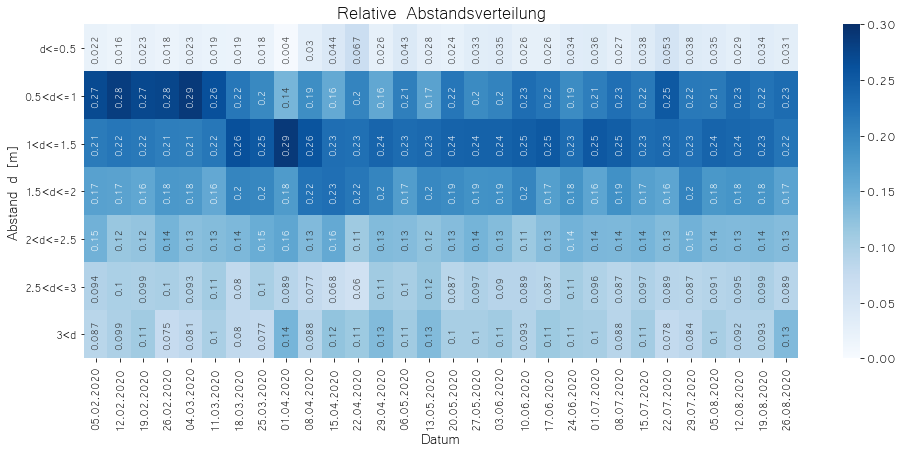

In [13]:
plt.figure(figsize = (16,8))
sb.heatmap(heatmapDfRelatvieSwap,cmap="Blues", vmin = 0, vmax = 0.3, annot = True, annot_kws = {"rotation": "vertical", 
                                                                                                 "fontweight": "heavy",
                                                                                                 "fontsize": 13})
plt.tick_params(labelsize=25)
plt.yticks(rotation=0, fontsize = 14)
plt.xticks(fontsize = 14)
plt.ylabel("Abstand d [m]", fontsize = 18, fontname = "Microsoft Yi Baiti")
plt.xlabel("Datum", fontsize = 18, fontname = "Microsoft Yi Baiti")
plt.title("Relative Abstandsverteilung", fontsize = 22,fontname="Microsoft Yi Baiti")

#Fontsize colorbar
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=16)
plt.gcf().subplots_adjust(bottom=0.3)
plt.savefig(r"Heatmap\Heatmap Relative Abstandsverteilung in Einstiegsbereich", dpi = 200)
